In [1]:
query="""
SELECT
  weight_pounds,
  is_male,
  mother_age,
  plurality,
  gestation_weeks
FROM
  publicdata.samples.natality
WHERE year > 2000
"""
from google.cloud import bigquery
df = bigquery.Client().query(query + " LIMIT 100").to_dataframe()
df.head()

,weight_pounds,is_male,mother_age,plurality,gestation_weeks
0,7.936641,False,30,1,38
1,8.624484,True,34,1,39
2,6.937947,True,23,1,39
3,6.935743,True,18,1,39
4,8.318041,False,23,1,40


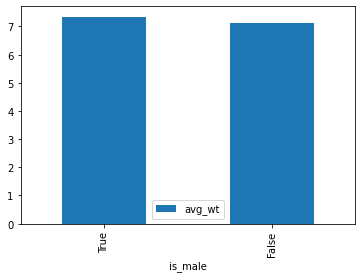

In [2]:
def get_distinct_values(column_name):
  sql = """
SELECT
  {0},
  COUNT(1) AS num_babies,
  AVG(weight_pounds) AS avg_wt
FROM
  publicdata.samples.natality
WHERE
  year > 2000
GROUP BY
  {0}
  """.format(column_name)
  return bigquery.Client().query(sql).to_dataframe()

df = get_distinct_values('is_male')
df.plot(x='is_male', y='avg_wt', kind='bar');

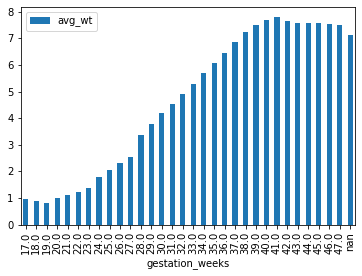

In [3]:
df = get_distinct_values('gestation_weeks')
df = df.sort_values('gestation_weeks')
df.plot(x='gestation_weeks', y='avg_wt', kind='bar');